In [1]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

#it allows you to quickly and easily visualize your data without having to save plots as image files or open them in a separate window


In [ ]:
imagein_cv = cv.imread('something_idk.jpg',1)

print(imagein_cv)

[[[41 39 28]
  [41 39 28]
  [41 39 28]
  ...
  [72 60 36]
  [72 60 36]
  [71 59 35]]

 [[41 39 28]
  [41 39 28]
  [41 39 28]
  ...
  [72 60 36]
  [71 59 35]
  [70 58 34]]

 [[41 39 28]
  [41 39 28]
  [41 39 28]
  ...
  [68 57 35]
  [67 57 33]
  [67 57 33]]

 ...

 [[16 16 16]
  [16 16 16]
  [16 16 16]
  ...
  [16 16 16]
  [16 16 16]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]
  ...
  [16 16 16]
  [16 16 16]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]
  ...
  [16 16 16]
  [16 16 16]
  [16 16 16]]]


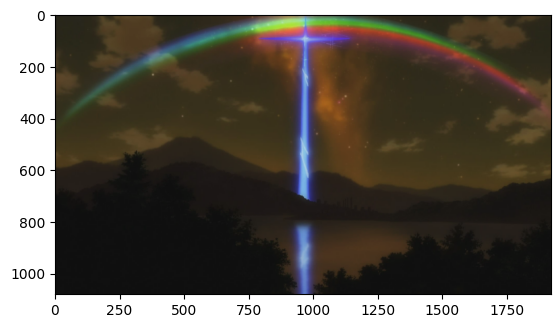

In [ ]:
plt.imshow(imagein_cv)

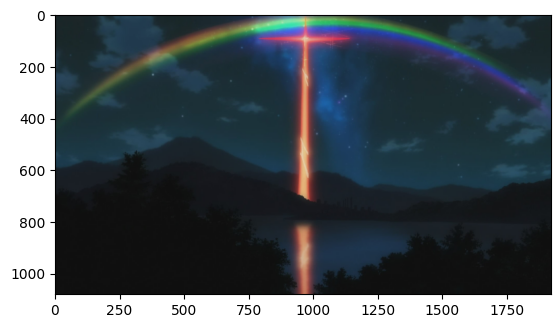

In [ ]:
imagein_cv_rgb=imagein_cv[:,:,::-1]

plt.imshow(imagein_cv_rgb)

Text(0.5, 1.0, 'merged image')

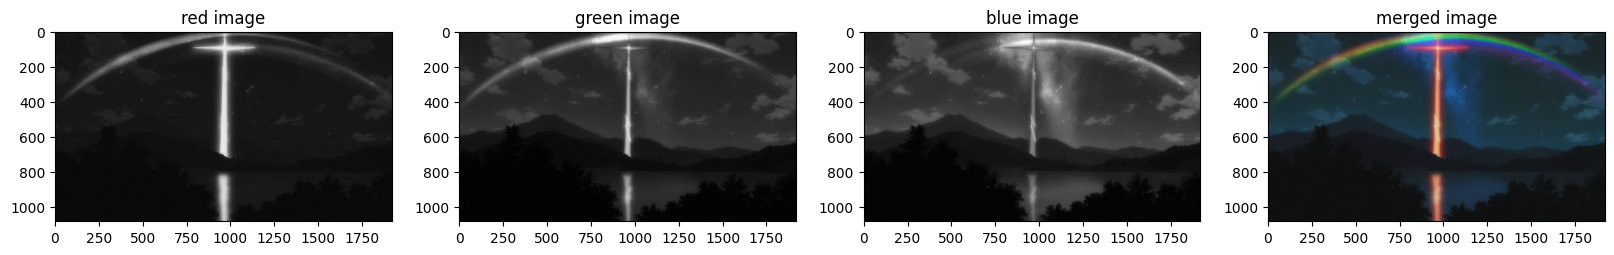

In [ ]:
b,g,r = cv.split(imagein_cv)

plt.figure(figsize=[20,5])

plt.subplot(141);plt.imshow(r,cmap='gray');plt.title('red image')
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title('green image')
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title('blue image')

imgcombined = cv.merge((b,g,r))
imgcombined = imgcombined[:,:,::-1]
plt.subplot(144)
plt.imshow(imgcombined)
plt.title('merged image')

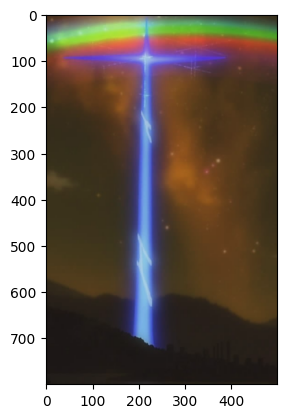

In [ ]:
co_img = imagein_cv[0:800,750:1250]

plt.imshow(co_img)

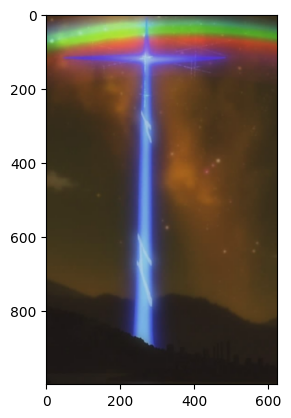

In [ ]:
dst = cv.resize(co_img,None,fx=1.25,fy=1.25)

plt.imshow(dst)

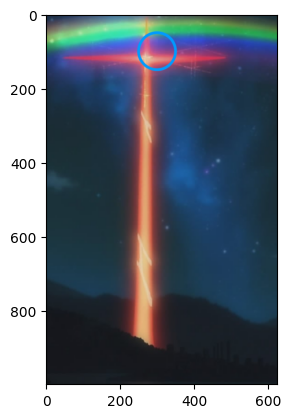

In [ ]:
cv.circle(dst,(300,100),50,(255,155,0),thickness = 5,lineType=cv.LINE_AA)

plt.imshow(dst[:, :, ::-1])

Text(0.5, 1.0, 'bright')

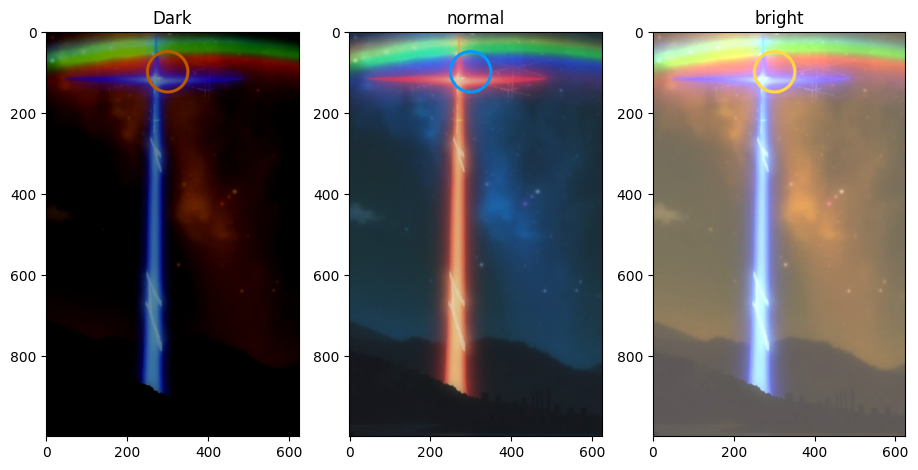

In [ ]:
base = np.ones(dst.shape,dtype="uint8")*65

base_bright = cv.add(dst,base)
base_dark = cv.subtract(dst,base)

figure = plt.figure(figsize=[15,10])

plt.subplot(141);plt.imshow(base_dark);plt.title("Dark")
plt.subplot(142);plt.imshow(dst[:, :, ::-1]);plt.title("normal")
plt.subplot(143);plt.imshow(base_bright);plt.title("bright")

In [18]:
PREVIEW  = 0  # Preview Mode
BLUR     = 1  # Blurring Filter
FEATURES = 2  # Corner Feature Detector
CANNY    = 3  # Canny Edge Detector

feature_params = dict(maxCorners=500, qualityLevel=0.2, minDistance=15, blockSize=9)
s = 0
if len(sys.argv) > 1:
    s = sys.argv[1]

image_filter = PREVIEW
alive = True

win_name = "Camera Filters"
cv.namedWindow(win_name, cv.WINDOW_NORMAL)
result = None

source = cv.VideoCapture(s)

while alive:
    has_frame, frame = source.read()
    if not has_frame:
        break

    frame = cv.flip(frame, 1)

    if image_filter == PREVIEW:
        result = frame
    elif image_filter == CANNY:
        result = cv.Canny(frame, 80, 150)
    elif image_filter == BLUR:
        result = cv.blur(frame, (13, 13))
    elif image_filter == FEATURES:
        result = frame
        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        corners = cv.goodFeaturesToTrack(frame_gray, **feature_params)
        if corners is not None:
            for x, y in np.float32(corners).reshape(-1, 2):
                cv.circle(result, (x, y), 10, (0, 255, 0), 1)

    cv.imshow(win_name, result)

    key = cv.waitKey(1)
    if key == ord("Q") or key == ord("q") or key == 27:
        alive = False
    elif key == ord("C") or key == ord("c"):
        image_filter = CANNY
    elif key == ord("B") or key == ord("b"):
        image_filter = BLUR
    elif key == ord("F") or key == ord("f"):
        image_filter = FEATURES
    elif key == ord("P") or key == ord("p"):
        image_filter = PREVIEW

source.release()
cv.destroyWindow(win_name)

In [3]:
s = 'vid.mp4'

strem = cv.VideoCapture(s)

if not strem.isOpened():
    print("Error in Source")

res,frame = strem.read()

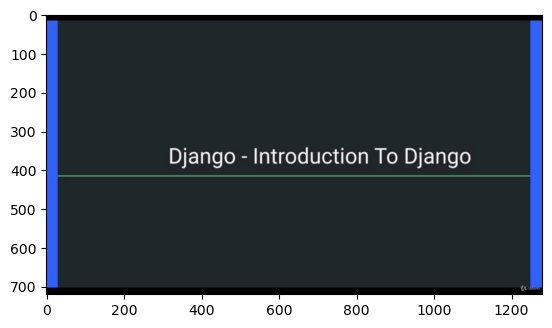

In [8]:
plt.imshow(frame[...,::-1])

In [22]:
frame_height = int (strem.get(3))
frame_width = int (strem.get(4))

cv_avi = cv.VideoWriter("vid_avi.avi",cv.VideoWriter_fourcc("M", "J", "P", "G"),10, (frame_width, frame_height))

In [23]:
while strem.isOpened():
    ret, frame = strem.read()

    if ret:
        cv_avi.write(frame)

    else:
        break

In [24]:
strem.release()
cv_avi.release()